# Introduction to Numpy
[Numpy](http://numpy.scipy.org/) is the fundamental library for scientific computing in Python. It contains list like objects that work like arrays, matrices, and data tables. This is how scientists typically expect data to behave. Numpy also provides linear algebra, Fourier transforms, random number generation, and tools for integrating C/C++ and Fortran code.

[Matplotlib](http://matplotlib.org/) is the reigning library for 2D (with budding support for 3D) scientific plotting in Python. It produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.  Between Numpy and Matplotlib, much of MATLAB's functionality can be replaced with Python.

If you primarily want to work with tables of data, [Pandas](pandas), which depends on Numpy, is probably the module that you want to start with.

## Why Numpy?

Python was never designed originally for scientific computing, and contains many high-level abstractions necessary to enable its enormously flexible object-oriented interface.  In Python, storing most integers requires more than just 4-8 bytes.  It also requires at least a couple pointers per-integer.  Performing a calculation on two numbers requires one or two bytecode operations, each of which can take dozens of CPU instructions for each pass through the Python eval loop.  And when it comes to looping and index operations of Python lists the situation is even more dire.

### A basic example

`Z = A + B * C`

In pure Python:

In [1]:
# Create 3 lists of a million ints
A = range(1000000)
B = range(1000000)
C = range(1000000)

In [2]:
%%timeit
# Time doing the operation with a for loop
Z = []
for idx in range(len(A)):
    Z.append(A[idx] + B[idx] * C[idx])
    
# print(Z)  # DON'T DO THIS!  It will print all 10000 array items

781 ms ± 44.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
# Create 3 Numpy arrays with a million ints

import numpy as np

A = np.arange(1000000)
B = np.arange(1000000)
C = np.arange(1000000)

Using Numpy:

In [4]:
%%timeit
# Time the operation with Numpy
Z = A + B * C

19.7 ms ± 368 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
# Print the result
Z = A + B * C
print(Z)

[           0            2            6 ... 999995000006 999997000002
 999999000000]


In addition to just *looking* simpler, the Numpy version is significantly faster. The for loop disappears completely and is replaced by vectorized array operations.  When printing very large arrays the output is also truncated by default, and for machine integers much less memory is used.

### Memory Usage
3 x 1000000 lists of Python ints: ~96 MB

3 x 1000000 Numpy arrays of 64-bit ints: ~32 MB

### More human-friendly interfaces to numerical libraries

<img src="https://raw.githubusercontent.com/embray/notebooks/master/images/caxpy.png" />

## Numpy and Matplotlib

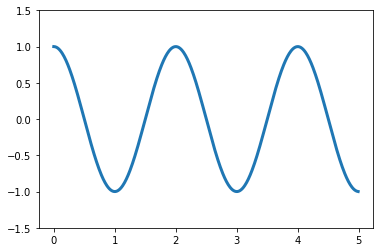

In [6]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

ax = plt.subplot(111)
x = np.arange(0.0, 5.0, 0.01)
y = np.cos(x * np.pi)
plt.ylim(-1.5, 1.5)
lines, = plt.plot(x, y, lw=3)

## Numpy Array Basics
#### Creating a Numpy array

In [7]:
# Create an array from a list of ints and show the array
import numpy

vals = [1, 2, 3]
arr = numpy.array(vals)
arr

array([1, 2, 3])

In [8]:
# Print the array--notice any difference?
print(arr)

[1 2 3]


Unlike Python lists, NumPy arrays are homogeneous: all values must have exactly the same type. This allows values to be packed together as shown here, which saves memory and is much faster to process.

<img src="https://raw.githubusercontent.com/embray/notebooks/master/images/list-vs-array.png" />

If we give NumPy initial values of different types, it finds the most general type and stores all the values in the array using that type. For example, if we construct an array from an integer and a float, the array's values are both floats: 

In [9]:
# Create an array from a heterogeneous list
arr = numpy.array([1, 2.3])
arr

array([1. , 2.3])

If we want a specific type, we can pass an optional argument to array called dtype (for "data type"). For example, we can tell NumPy to create an array of 32-bit floats even though all the initial values are integers: 

In [10]:
# Create an array of floats from a list of ints
numpy.array([1, 2, 3, 4], dtype=numpy.float32)

array([1., 2., 3., 4.], dtype=float32)

NumPy provides many basic numerical data types, each of which is identified by a name like float32.
The three called `int`, `float`, and `complex` are whatever the underlying hardware+OS platform uses as its native C types: this will usually be 32- or 64-bit.

Note: Changing the dtype of an array is usually not going to yield anything useful.  Instead use `arr.astype()` or similar:

In [11]:
# Create arrays of ints, floats, and complex from lists of ints
print(numpy.array([1, 2, 3, 4], dtype=numpy.int))
print(numpy.array([1, 2, 3, 4], dtype=numpy.float))
print(numpy.array([1, 2, 3, 4], dtype=numpy.complex))

[1 2 3 4]
[1. 2. 3. 4.]
[1.+0.j 2.+0.j 3.+0.j 4.+0.j]


In [12]:
# Create an array of ints and show the dtype
arr = numpy.array([1, 2, 3, 4], dtype=numpy.int32)
print(arr)

# Try reassigning the dtype to float
arr.dtype = numpy.float32
print(arr)

# Restore the correct dtype and use .astype() instead
arr.dtype = numpy.int32
print(arr.astype(numpy.float32))

[1 2 3 4]
[1.e-45 3.e-45 4.e-45 6.e-45]
[1. 2. 3. 4.]


There are many other ways to create arrays besides calling the basic `array()` constructor. For example, the `zeros()` function takes a tuple specifying array dimensions as an argument and returns an array of zeros of that size: 

In [13]:
# Create a 2x3 array of zeros
z = numpy.zeros((2, 3))
z

array([[0., 0., 0.],
       [0., 0., 0.]])

The array's dtype defaults `float` unless something else is specified with the `dtype=` argument. This is typical in most functions in Numpy that create/return arrays.

In [14]:
# Create a 2x3 array of integer zeros
z = numpy.zeros((2, 3), dtype=numpy.int32)
z

array([[0, 0, 0],
       [0, 0, 0]], dtype=int32)

In [15]:
# The ones and identity functions work much the same way:
print(numpy.ones((2, 3)))
print()
print(numpy.identity(2))

[[1. 1. 1.]
 [1. 1. 1.]]

[[1. 0.]
 [0. 1.]]


It's also possible to create NumPy arrays without filling them with data using the empty function. This function does not initialize the values, so the array contains whatever bits were lying around in memory when it was called:

In [16]:
# Create a 2x2 empty array
arr = numpy.empty((2, 2))
arr

array([[1., 0.],
       [0., 1.]])

This might not seem particularly useful, but if a program is going to overwrite an array immediately after creating it, perhaps by filling it with the result of some computation, there's no point taking the time to fill it with zeroes or ones.

In [17]:
# Another frequently useful array creation function is arange:

arr = np.arange(10, 20)
print(arr)

[10 11 12 13 14 15 16 17 18 19]


In [18]:
arr = np.arange(10, 20, 0.1)
print(arr)

[10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1 11.2 11.3
 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5 12.6 12.7
 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9 14.  14.1
 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3 15.4 15.5
 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7 16.8 16.9
 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1 18.2 18.3
 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5 19.6 19.7
 19.8 19.9]


[  0.           5.26315789  10.52631579  15.78947368  21.05263158
  26.31578947  31.57894737  36.84210526  42.10526316  47.36842105
  52.63157895  57.89473684  63.15789474  68.42105263  73.68421053
  78.94736842  84.21052632  89.47368421  94.73684211 100.        ]


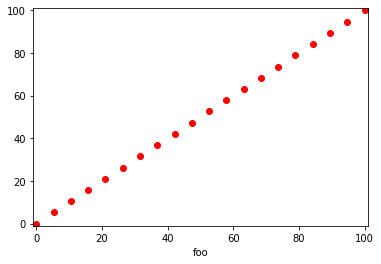

In [19]:
# linspace can be used to create an n-sized array of evenly spaced samples in some range:

arr = np.linspace(0, 100, 20)
print(arr)

plt.axis([-1, 101, -1, 101])
plt.xlabel('foo')
lines, = plt.plot(arr, arr, 'ro')

[ 1.          1.12883789  1.27427499  1.43844989  1.62377674  1.83298071
  2.06913808  2.33572147  2.6366509   2.97635144  3.35981829  3.79269019
  4.2813324   4.83293024  5.45559478  6.15848211  6.95192796  7.8475997
  8.8586679  10.        ]


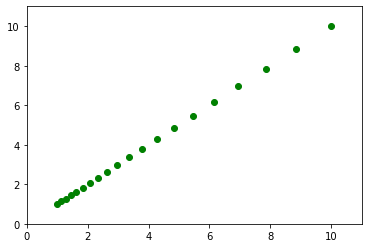

In [20]:
# Likewise, logspace 
arr = np.logspace(0, 1, 20, base=10)
print(arr)
plt.axis([0, 11, 0, 11])
lines, = plt.plot(arr, arr, 'go')

#### Creating a 2D array

In [21]:
# Create a 3x3 array

import numpy as np

example_array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
example_array

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

As with everything else in Python, assigning an array to a variable does not copy its data. Instead, it creates an alias for the original data. For example, let's create an array of ones and assign it to a variable `first`, then assign the value of `first` to `second`: 

In [22]:
# Variable assignment does not *copy* data in array; it just creates a new pointer to that array
first = numpy.ones((2, 2))
second = first
print(first)

[[1. 1.]
 [1. 1.]]


In [23]:
# Index assignment updates elements in an array
# To index N-D arrays use a , to separate the indices into each dimension

second[0, 0] = 9
print(first)

[[9. 1.]
 [1. 1.]]


If we really want a copy of the array so that we can make changes without affecting the original data, we can use the copy method:

In [24]:
# If we really want a copy we can use the .copy() method
first = numpy.ones((2, 2))
print(first)
print()

second = first.copy()
second[0, 0] = 9
print('first:')
print(first)
print()
print('second:')
print(second)

[[1. 1.]
 [1. 1.]]

first:
[[1. 1.]
 [1. 1.]]

second:
[[9. 1.]
 [1. 1.]]


Arrays have properties as well as methods. We have already met dtype, which is the array's data type. Another is shape, which is a tuple of the array's size along each dimension: 

In [25]:
# Show the shape

print(first)
print(first.shape)

[[1. 1.]
 [1. 1.]]
(2, 2)


It is possible to modify an array's shape, but be careful that the total number of elements in the array is still the same:

In [26]:
# Modify the shape with a valid shape

first.shape = (4, 1)
first

array([[1.],
       [1.],
       [1.],
       [1.]])

In [27]:
# Modify the shape with an invalid shape

first.shape = (3, 2)
first

ValueError: cannot reshape array of size 4 into shape (3,2)

Notice that there are no parentheses after `shape`: it is a piece of data, not a method call. Also note that the tuple in `shape` is exactly what we pass into functions like `zeros` to create new arrays, which makes it easy to reproduce the shape of existing data:

In [28]:
# You can use .shape to define new arrays with that shape
blank = np.zeros(first.shape)
blank

array([[0.],
       [0.],
       [0.],
       [0.]])

Other data members include `size`, which is the total number of elements in the array, and `nbytes` which is the total physical bytes of memory used by the array. As the code below shows, `size` is simply the product of the array's lengths along its dimensions, and `nbytes` is the product of `size` and the size of the data type:

In [29]:
# Arrays also have .size and .nbytes attributes
block = numpy.zeros((4, 7, 3))
print('size:', block.size)
print('nbytes:', block.nbytes)

size: 84
nbytes: 672


There are also special methods for reshaping the array in common ways. We can rearrange the data in an array using the `transpose` method, which flips the array on all its axes. This does not actually move data around in memory. Instead, it creates an alias that appears to have the values stored differently.  We also call this a *view* of the array:

In [30]:
# .transpose() creates a *view* of the same data but transposed

arr = numpy.array([[1, 2, 3],
                   [4, 5, 6]])

print(arr.transpose())
print()
print('The original array is unchanged:')
print(arr)

[[1 4]
 [2 5]
 [3 6]]

The original array is unchanged:
[[1 2 3]
 [4 5 6]]


In [31]:
# However, modifying the transposed array will modify the original array
# (unless we explictly make a copy of it first)
trans = arr.transpose()
trans[1, 1] = 42
print(trans)
print()
print(arr)

[[ 1  4]
 [ 2 42]
 [ 3  6]]

[[ 1  2  3]
 [ 4 42  6]]


This is a common enough operation (especially on matrices) that `arr.T` can be used as shorthand for `arr.transpose()`.  Note that this is not a function call with parentheses after it:

In [32]:
# We can also use arr.T
print(arr.T)

[[ 1  4]
 [ 2 42]
 [ 3  6]]


The `ravel` method does something similar: it creates a one-dimensional view of the original data. As you'd expect, the result's shape has a single value, which is the number of elements we started with.

In [33]:
# .ravel() creates a 1-dimensional view of the original data
print(arr.ravel())
print()
print('The original array is still unchanged:')
print(arr)

[ 1  2  3  4 42  6]

The original array is still unchanged:
[[ 1  2  3]
 [ 4 42  6]]


But even though the array returned by `ravel()` has a different shape it's worth emphasizing again that it is a *view* of the original array, and that modifying its contents will modify the original array too:

In [34]:
# Remember, the result of .ravel() is just a view; updating the array returned by
# .ravel() updates the original array data too
arr.ravel()[3] = 9
print(arr)

[[ 1  2  3]
 [ 9 42  6]]


What order do raveled values appear in? Let's start by thinking about a 2×4 array `A`. It looks two-dimensional, but the computer's memory is 1-dimensional: each location is identified by a single integer address. Any program that works with multi-dimensional data must therefore decide how to lay out those values. 

<img src="https://raw.githubusercontent.com/embray/notebooks/master/images/logical_layout.png" />

One possibility is *row-major order*, which concatenates the rows. This is what C uses, and since Python was originally written in C, it uses the same convention: 

<img src="https://raw.githubusercontent.com/embray/notebooks/master/images/row_major_layout.png" />

In contrast, column-major order concatenates the columns. FORTRAN does this, and MATLAB follows along.

<img src="https://raw.githubusercontent.com/embray/notebooks/master/images/column_major_layout.png" />

There's no real difference in performance or usability, but the differences cause headaches when data has to be moved from one programming language to another. For example, if your Python code wants to call an eigenvalue function written in FORTRAN, you will probably have to rearrange the data, just as you have to be careful about 0-based versus 1-based indexing. Note that you cannot use the array's `transpose` method to do this, since, as explained earlier, it doesn't actually move data around.

It's also possible that if your software is specifically tuned to operate on an array one row at a time or one column at a time it may be desireable to have the data arranged in memory so that it's accessed linearly. But this is the kind of performance tuning you won't need until and unless you *know* you need it.  For the most part stick with row-major order (the default in Numpy) and don't worry about it.

If we really want to change the physical size of the data, we have to use array.resize. This works in place, i.e., it modifies the array, rather than returning a new alias: 

In [35]:
# Resize a larger array to a smaller array

block = numpy.arange(9)
print(block)
print()

block.resize(2, 2)
print(block)


[0 1 2 3 4 5 6 7 8]

[[0 1]
 [2 3]]


As the example above shows, when we resize a 3×3 array to be 2×2, we get the values that were in the first two rows and columns. (And note that once again, the new dimensions are passed directly, rather than in a tuple.)

If we enlarge the array by resizing, the new locations are assigned zero. Which locations are "new" is determined by the raveling order of the array; as the example below shows, the existing values are packed into the first part of memory, *not* into the upper left corner of the logical matrix: 

In [36]:
# Resize a smaller array to a larger array
small = numpy.ones((2, 2))
print(small)
print()

large = small.copy()
large.resize(3, 3)
print(large)

[[1. 1.]
 [1. 1.]]

[[1. 1. 1.]
 [1. 0. 0.]
 [0. 0. 0.]]


It is, however, possible to fill the upper left corner by first allocating a new array of zeros and using slice assignment:

In [37]:
# Fill a corner of an array from a smaller array
large = numpy.zeros((3, 3))
large[:2, :2] = small
print(large)

[[1. 1. 0.]
 [1. 1. 0.]
 [0. 0. 0.]]


### Indexing Numpy Arrays

Now we'll take a closer look at some of the ways we can index arrays. It may seem like a small topic at first, but clever indexing allows us to avoid writing loops, which reduces the size of our code and makes it more efficient.

Arrays are subscripted by integers, just like lists and other sequences, so they can be sliced like other sequences as well. For example, if `block` is the array shown below, then `block[0:3, 0:2]` selects its first three rows and the first two columns: 

<img src="https://raw.githubusercontent.com/embray/notebooks/master/images/slice_2d.png" />

The comma syntax (`[X, Y]`) for indexing multi-dimensional arrays was lobbied for and eventually added to the Python language by the scientific community.  Although it is possible to write `block[0:3][0:2]` this is comparatively inefficient, especially when doing many array indexing operations. (Exercise question: Why?)

As with other sliceable types, it's possible to assign to slices (as we saw a bit earlier). For example, we can assign zero to columns 1 and 2 in row 1 of ``block in a single statement: 

In [38]:
# Assign zero to a slice of the first row
block = numpy.array([[10, 20, 30, 40],
                     [110, 120, 130, 140],
                     [210, 220, 230, 240]])
block[0, 1:3] = 0
print(block)

[[ 10   0   0  40]
 [110 120 130 140]
 [210 220 230 240]]


And, as with most other operations (such as `transpose` and `ravel` like I saw earlier), slicing creates an alias rather than immediately copying data: 

In [39]:
# Create a 2D array
original = numpy.arange(6).reshape((3, 2))
original

array([[0, 1],
       [2, 3],
       [4, 5]])

In [40]:
# Slice a corner of of the array
slc = original[0:2, 0:2]
slc

array([[0, 1],
       [2, 3]])

In [41]:
# Set the values of the slice to zero--the original has changed
slc[:, :] = 0
original

array([[0, 0],
       [0, 0],
       [4, 5]])

Notice in the example above how we used `slice[:, :]` to refer to all of the array's elements at once. All of Python's other slicing shortcuts work as well, so that expressions like `original[-2:, 1:]` behave sensibly.

Slicing on both sides of an assignment is a way to shift data along the axes. If `vector` is a one-dimensional array, then `vector[1:4]` selects locations 1, 2, and 3, while `vector[0:3]` selects locations 0, 1, and 2. Assigning the former to the latter therefore overwrites the lower three values with the upper three, leaving the uppermost value untouched:

In [42]:
# Assign a slice of a vector to another slice of the same vector
vector = numpy.array([10, 20, 30, 40])
vector[0:3] = vector[1:4]
vector

array([20, 30, 40, 40])

Compare this with loop-based code that shifts values up or down, and you'll see why most programmers prefer the vectorized programming model. 

We co do even more sophisticated things by using a list or an array as a subscript. For example, if `subscript` is a list containing 3, 1, and 2, then `vector[subscript]` creates a new array whose elements are selected from vector in the obvious way: 

<img src="https://raw.githubusercontent.com/embray/notebooks/master/images/list_subscript.png" />

In [43]:
# Create the vector [0, 10, 20, 30] using arange() and *
vector = numpy.arange(4) * 10
vector

array([ 0, 10, 20, 30])

In [44]:
# Index with a list of indices
subscript = [3, 1, 2]
vector[subscript]

array([30, 10, 20])

In [45]:
# It should be emphasized that such arbitrary subscripting returns a *copy* of the original array:
sub = vector[subscript]
sub[:] = 0
vector

array([ 0, 10, 20, 30])

In [46]:
# It is however possible to perform assignment into an array using an arbitrary subscript,
# without copying
subscript = [0, 3]
vector[subscript] = 42
vector

array([42, 10, 20, 42])

#### Boolean indexing

We can use Boolean masking on the left side of assignment as well, though we have to be careful about its meaning. If we use a mask directly, elements are taken in order from the source on the right and assigned to elements corresponding to True values in the mask: 

In [47]:
# Mask an array [0 1 2 3] with the mask [T F T F]
a = numpy.array([0, 1, 2, 3])
mask = [True, False, True, False]
a[mask]

array([0, 2])

In [48]:
# Assign [101 102 103 104] using the mask
a[mask] = numpy.array([101, 102, 103, 104])[mask]
a

array([101,   1, 103,   3])

<img src="https://raw.githubusercontent.com/embray/notebooks/master/images/mask_assignment_to.png" />

Operators like `<` and `==` work the way we would expect with arrays, but there is one trick. Python does not allow objects to re-define the meaning of `and`, `or`, and `not`, since they are keywords. The expression `(vector <= 20) and (vector >= 20)` therefore produces an error message instead of selecting elements with exactly the value 20: 

In [49]:
# Give the items <= 20 of [0 10 20 30]
vector = numpy.array([0, 10, 20, 30])
vector <= 20

array([ True,  True,  True, False])

In [50]:
# Gives the items <= 20 and > 0
(vector <= 20) and (vector > 0)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

One way around this is to use functions like `logical_and` and `logical_or`, which combine the elements' Boolean arrays like their namesakes: 

In [51]:
# Do the same expression with logical_and
numpy.logical_and(vector <= 20, vector > 0)

array([False,  True,  True, False])

Another is to use the bitwise and/or operators `&` and `|`:

In [52]:
# Do the same expression with &
(vector <= 20) & (vector > 0)

array([False,  True,  True, False])

In [53]:
# Since comparison operators return an array of bools, a comparison expression
# can also be used to index an array

array1 = np.array([1, 1, 1, 2, 2, 2, 1])
array2 = np.array([1, 2, 3, 4, 5, 6, 7])
array2[array1 == 1]

array([1, 2, 3, 7])

There are many other slick ways to index and get values from Numpy arrays, such as `array.where()`, `array.select()`, and `array.choose()`.  Some of them can get very complex and difficult to understand, but have their uses--you can read more about them and other indexing tricks in the [Numpy documentation](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html), as well as its more advanced [indexing routines](https://docs.scipy.org/doc/numpy/reference/routines.indexing.html).

## Math
### Arrays
Math on arrays is vectorized and behaves more or less like "most" scientists would expect:

In [54]:
array1 = np.array([1, 1, 1, 2, 2, 2, 1])
array2 = np.array([1, 2, 3, 4, 5, 6, 7])

array1 * 2 + 1

array([3, 3, 3, 5, 5, 5, 3])

In [55]:
# Multiply array1 and array2
array1 * array2

array([ 1,  2,  3,  8, 10, 12,  7])

But that doesn't mean they behave exactly like the matrices that mathematicians use. For example, let's create an array, and then multiply it by itself: 

In [56]:
# Create a 2x2 array and multiply it with itself
arr = numpy.array([[1, 2], [3, 4]])
arr * arr

array([[ 1,  4],
       [ 9, 16]])

NumPy does the operation elementwise, instead of doing "real" matrix multiplication. On the bright side, elementwise operation means that array addition works as you would expect: 

In [57]:
# Now add it with itself
arr + arr

array([[2, 4],
       [6, 8]])

And since there's only one sensible way to interpret an expression like "array plus one", NumPy does the sensible thing there too. 

In [58]:
# Add 1 to all elements--note that this does not *modify* arr
arr + 1

array([[2, 3],
       [4, 5]])

Like other array-based libraries or languages, NumPy provides many useful tools for common arithmetic operations. For example, we can add up the values in our array with a single function call: 

In [59]:
# Sum the array
numpy.sum(arr)

10

We can also calculate the partial sum along each axis by passing an extra argument into `sum`: 

In [60]:
# Sum along the row-axis
numpy.sum(arr, axis=0)

array([4, 6])

In [61]:
# Sum along the column-axis
numpy.sum(arr, axis=1)

array([3, 7])

### Matrices
There also exists a special matrix class that behaves more naturally like a matrix. For example the `*` operator on two matrix objects performs matrix multiplication:

In [62]:
# Make a 2x3 and a 3x1 matrix/column vector and mupltiply the former by the latter
matrix1 = np.matrix([[1, 2, 3], [4, 5, 6]])
matrix2 = np.matrix([1, 2, 3]).transpose()
matrix1 * matrix2

matrix([[14],
        [32]])

In [63]:
# Multiply a matrix by its transpose
matrix1 * matrix1.transpose()

matrix([[14, 32],
        [32, 77]])

Various basic linear algebra operations are also possible on matrics; inverse, eigenvalues, determinants, etc.; many of these are available through the [`np.linalg`](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html) module:

In [64]:
A = np.matrix([
    [2, 0, 0],
    [1, 1, 1],
    [0, 0, 2]
])

In [65]:
np.linalg.inv(A)

matrix([[ 0.5,  0. ,  0. ],
        [-0.5,  1. , -0.5],
        [ 0. ,  0. ,  0.5]])

In [66]:
np.linalg.det(A)

4.0

In [67]:
eigenvals, eigenvects = np.linalg.eig(A)
print(eigenvals)
print(eigenvects)

[1. 2. 2.]
[[0.         0.70710678 0.        ]
 [1.         0.70710678 0.70710678]
 [0.         0.         0.70710678]]


Other functions are applied element-wise to the matrix, just as they are on plain arrays:

In [68]:
np.exp(A)

matrix([[7.3890561 , 1.        , 1.        ],
        [2.71828183, 2.71828183, 2.71828183],
        [1.        , 1.        , 7.3890561 ]])

## Importing and Exporting Data
The numpy function `genfromtxt()` is a powerful way to import text data.
It can use different delimiters, skip header rows, control the type of imported data, give columns of data names, handle missing data, and a number of other useful goodies. See the [documentation](http://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html) for a full list of features of run `help(np.genfromtxt)` from the Python shell (after importing the module of course).

The more recently added [`np.loadtxt`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html) is similar to `genfromtxt` but a bit simpler, and does not have options for handling missing data.

### Basic Import and Export
#### Import
Basic imports using Numpy will treat all data as floats.
If we're doing a basic import we'll typically want to skip the header row (since it's generally not composed of numbers).

In [69]:
!cat data/examp_data.txt

a,   b,   c,   d
1.0, 2.0, 4.0
5.0, 6.0, 7.0
1e2, 2e3, 4e5
1e-2, 2e-3, 4.345e-5


In [70]:
# Use genfromtxt() to create an array from the file
data = np.genfromtxt('./data/examp_data.txt', delimiter=',', skip_header=1)
data

array([[1.000e+00, 2.000e+00, 4.000e+00],
       [5.000e+00, 6.000e+00, 7.000e+00],
       [1.000e+02, 2.000e+03, 4.000e+05],
       [1.000e-02, 2.000e-03, 4.345e-05]])

#### Export

In [71]:
# Use savetxt() to dump the output to a new file with a different delimiter
np.savetxt('./data/examp_output.txt', data, delimiter=', ')

In [72]:
!cat data/examp_output.txt

1.000000000000000000e+00, 2.000000000000000000e+00, 4.000000000000000000e+00
5.000000000000000000e+00, 6.000000000000000000e+00, 7.000000000000000000e+00
1.000000000000000000e+02, 2.000000000000000000e+03, 4.000000000000000000e+05
1.000000000000000021e-02, 2.000000000000000042e-03, 4.344999999999999904e-05


### Importing Data Tables
Lots of scientific data comes in the form of tables, with one row per observation, and one column per thing observed.
Often the different columns to have different types (including text).
The best way to work with this type of data is in a Structured Array.

#### Import
To do this we let Numpy automatically detect the data types in each column using the optional argument ``dtype=None``.
We can also use an existing header row as the names for the columns using the optional arugment ``Names=True``.

In [73]:
!cat data/examp_data_species_mass.txt

site,species,mass
1,DS,125
1,DM,70
2,DM,55
1,CB,40
2,DS,110
1,CB,45


In [74]:
# Use genfromtxt to create a table from the data including the column names
data = np.genfromtxt('./data/examp_data_species_mass.txt', dtype=None, names=True, delimiter=',', encoding='ascii')
data

array([(1, 'DS', 125), (1, 'DM',  70), (2, 'DM',  55), (1, 'CB',  40),
       (2, 'DS', 110), (1, 'CB',  45)],
      dtype=[('site', '<i8'), ('species', '<U2'), ('mass', '<i8')])

#### Export
The easiest way to export a structured array is to treat it like a list of lists and export it as CSV, either using the plain Python [`csv`](https://docs.python.org/3/library/csv.html) module, or using NumPy built-ins like [`np.savetxt`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.savetxt.html#numpy.savetxt):

In [75]:
# Use np.savetxt to write a structured array to a CSV file with
# colum headings; for demonstration purposes we will use
# `io.StringIO` to write the file directly in memory
import io
out = io.StringIO()
np.savetxt(out, data, delimiter=',', fmt=['%d', '%s', '%d'], header=','.join(data.dtype.names))
out.seek(0)  # rewind to the beginning of the file for reading
print(out.read())

# site,species,mass
1,DS,125
1,DM,70
2,DM,55
1,CB,40
2,DS,110
1,CB,45



Other libraries such as [Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) and [AstroPy](https://docs.astropy.org/en/stable/io/ascii/) have additional, more advanced tools for writing arrays to ASCII formats.

#### Binary export

NumPy also supports saving arrays to a variety of binary formats, with and without compression. E.g. to save one or more large arrays compressed to NumPy's own `.npz` format, you can use [`np.savez_compressed`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.savez_compressed.html):

In [76]:
A = np.eye(1000)  # 1000x1000 identity matrix
B = np.arange(1000)
print('array data size in bytes:', A.nbytes + B.nbytes)

# Again we will use an in-memory file for demonstration purposes
out = io.BytesIO()
np.savez_compressed(out, A=A, B=B)
print('size of compressed file in bytes', out.tell())

# Load the arrays back from the .npz file:
out.seek(0)
npz = np.load(out)
print('A:', npz['A'])
print('B:', np.array2string(npz['B'], threshold=10))

array data size in bytes: 8008000
size of compressed file in bytes 11522
A: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
B: [  0   1   2 ... 997 998 999]


Structured Arrays
-----------------
If we import data into a [Structured Array](https://docs.scipy.org/doc/numpy/user/basics.rec.html) we can do a lot of things that we often want to do with scientific data:

#### Selecting columns by name

In [77]:
data = np.genfromtxt('./data/examp_data_species_mass.txt', dtype=None, names=True, delimiter=',', encoding='ascii')
print(data)
data['species']

[(1, 'DS', 125) (1, 'DM',  70) (2, 'DM',  55) (1, 'CB',  40)
 (2, 'DS', 110) (1, 'CB',  45)]


array(['DS', 'DM', 'DM', 'CB', 'DS', 'CB'], dtype='<U2')

#### Subset columns based on the values in other columns

In [78]:
# Select the masses from rows in which the species is 'DM'
data['mass'][data['species'] == 'DM']

array([70, 55])

In [79]:
# Same as above but only where site==1
data['mass'][(data['species'] == 'DM') & (data['site'] == 1)]

array([70])

## Random number generation
#### Random uniform (0 to 1)

In [80]:
np.random.rand(3, 5)

array([[0.11451129, 0.80733432, 0.19928318, 0.43596293, 0.30708262],
       [0.81165281, 0.09218951, 0.28691471, 0.48291674, 0.07548096],
       [0.18271257, 0.96114058, 0.37325949, 0.52538718, 0.59252158]])

#### Random normal (mean=0, stdev=1)

In [81]:
np.random.randn(4, 2)

array([[ 0.02663572,  0.69810456],
       [ 0.10084349,  0.58264269],
       [-0.39189663, -1.09160958],
       [ 0.1722847 , -0.12605801]])

#### Random integers

In [82]:
min = 10
max = 20
np.random.randint(min, max, [10, 2])

array([[15, 15],
       [11, 12],
       [18, 18],
       [19, 17],
       [11, 17],
       [15, 11],
       [14, 13],
       [16, 15],
       [10, 15],
       [12, 10]])

# More advanced analysis with SciPy

Although NumPy has a fair bit of basic and intermediate functionality, there is a large collection of more advanced functions and numerical routines (special functions, numerical ODE solvers and integrators, etc.) available in NumPy's sister project [SciPy](https://docs.scipy.org/doc/scipy/reference/).  We do not have space in this tutorial to even scratch the surface of what's available in SciPy, so you are encouraged to peruse the documentation on your own time.  Many projects in the scientific Python ecosystem are built with NumPy in mind, and use SciPy as well.

## Special functions

Many common special functions are implemented in [`scipy.special`](https://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special).  E.g. [`scipy.special.jv`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.jv.html#scipy.special.jv) implements Bessel functions of the first kind $ J_v(z) $:

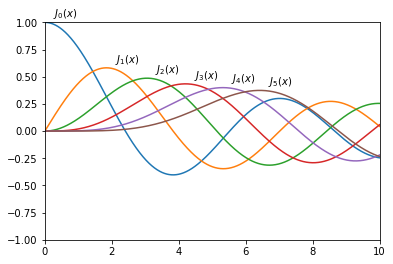

In [83]:
from scipy import special
from matplotlib import pyplot as plt

plt.xlim(0, 10)
plt.ylim(-1, 1)
x = np.linspace(0, 10, 1000)

for v in range(6):
    y = special.jv(v, x)
    plt.plot(x, special.jv(v, x))
    
    # Add labels
    maximum = np.argmax(y)
    xpos = x[maximum] + 0.25  # trial and error
    ypos = y[maximum] + 0.05
    plt.text(xpos, ypos, f'$ J_{v}(x) $ ')

## Numerical integration

Functions can be integrated numerically over a given interval using, among other more specialized functions [`scipy.integrate.quad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad).  For example:

$$
\int_0^{2\pi} J_1(x)dx
$$

In [84]:
from scipy.integrate import quad
val, err = quad(lambda x: special.jv(1, x), 0, 2 * np.pi)
print('val:', val)
print('error upper bound:', err)

val: 0.7797230914600654
error upper bound: 2.2568868939342564e-14


## Solving ODEs

Solve $ y(x) $ for

$$
x^2\frac{d^2y}{dx^2} + x\frac{dy}{dx} + (x^2 - 1)y = 0
$$

with initial values $ y(0) = 0, y'(0) = 1 $.

using [`scipy.integrate.odeint`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html).  `odeint()` solves first-order ODEs, so first we must convert to one by defining $ z = y' $ so that:

$$
\frac{dz}{dx} = \frac{y}{x^2} - \frac{z}{x} - y
$$

We can then solve for $ y $ and $ z $ simulateously by packing them into a vector ``[y, z]``:

In [85]:
from scipy.integrate import odeint

def func(yz, x):
    y, z = yz
    return [z, y/x**2 - z/x - y]  # [dy/dx, dz/dx]

# Solve over 100 points between 0 and 10
# Use a small epsilon for the initial value to avoid divide by zero
eps = np.finfo(float).eps
x = np.linspace(eps, 10, 100)
sol = odeint(func, [eps, 1], x)
print(np.array2string(sol, threshold=10))

[[ 2.22044605e-16  1.00000000e+00]
 [ 1.00881275e-01  9.96176043e-01]
 [ 2.00991249e-01  9.84738324e-01]
 ...
 [ 1.86656647e-01 -4.83226357e-01]
 [ 1.37239097e-01 -4.94407661e-01]
 [ 8.69454926e-02 -5.00565953e-01]]


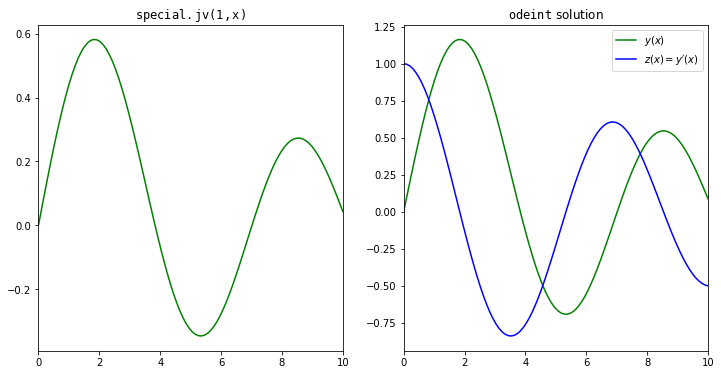

In [86]:
# Plot the solution against the known answer:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(x, special.jv(1, x), c='g')
ax1.set_xlim(0, 10)
ax1.set_title(r'$ \mathtt{special.jv(1, x)} $')

ax2.plot(x, sol[:,0], c='g', label='$ y(x) $')
ax2.plot(x, sol[:,1], c='b', label="$ z(x) = y'(x) $")
ax2.set_xlim(0, 10)
ax2.set_title(r'$ \mathtt{odeint} $ solution')
ax2.legend()